# **Applied Statistics Project**

---

**Author: Damien Farrell**

---

In [120]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

sns.set_theme()

## **Project Task**

> Complete the project in a single notebook called `project.ipynb` in your repository.
The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits.
Use plots as appropriate.
<br><br>
In this project, you will analyze the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv).
You will find [a short description](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html) of it on [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/).
The dataset contains two main variables, a treatment group and the weight of plants within those groups.
>
> Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work.
In doing this you should:
>
> 1. Download and save the dataset to your repository.
>
> 2. Describe the data set in your notebook.
>
> 3. Describe what a t-test is, how it works, and what the assumptions are.
>
> 4. Perform a t-test to determine whether there is a significant difference between the two treatment groups `trt1` and `trt2`.
>
> 5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups `ctrl`, `trt1`, and `trt2`.
>
> 6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.
> <br><br>

### **1. Download and save the dataset to your repository.**

**References:**
1. [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv)

In [121]:
df = pd.read_csv('data/plantgrowth.csv', index_col=0)

df.head(5)

,weight,group
rownames,,
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


### **2. Describe the data set in your notebook.**

**References:**
1. [pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas-dataframe-describe)
1. [scipy.stats.shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro)
1. [pandas.DataFrame.boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html#pandas-dataframe-boxplot)
1. [scipy.stats.levene](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#levene)

In [122]:
df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


The weights vary from 3.59 to 6.31. The mean is 5.07.

In [123]:
df['group'] = df['group'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   weight  30 non-null     float64 
 1   group   30 non-null     category
dtypes: category(1), float64(1)
memory usage: 642.0 bytes


In [124]:
df['group'].value_counts()

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64

The dataset consists of a continuous variable (weight) and a categorical treatment group variable with three levels: "ctrl", "trt1", and "trt2".

**Variables:**

1. weight: A continuous numeric variable representing the dried weight of the plants.
1. group: A factor (categorical) variable representing the treatment condition. There are three groups:
    - "ctrl": control group
    - "trt1": treatment group 1
    - "trt2": treatment group 2

The dataset consists of 30 observations, each corresponding to one plant. There are 10 plants in each of the three groups.

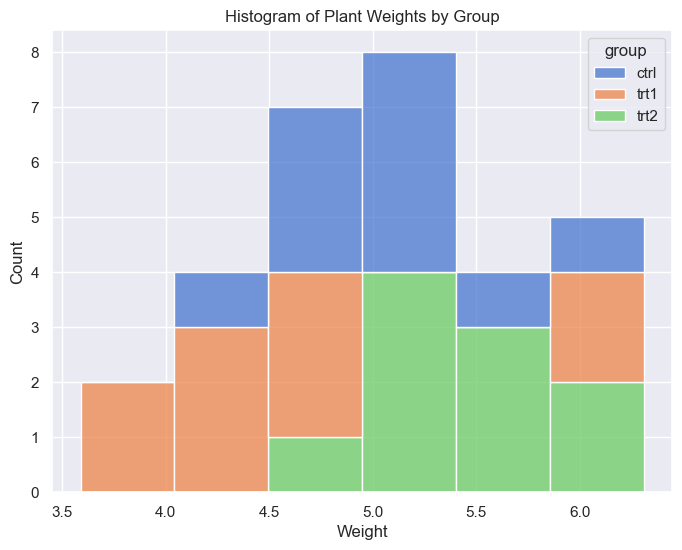

In [125]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="weight", hue="group", palette="muted", multiple="stack")
plt.title("Histogram of Plant Weights by Group")
plt.xlabel("Weight")
plt.show()

In [126]:
# Perform the Shapiro Wilk test.
stats.shapiro(df['weight'])

ShapiroResult(statistic=np.float64(0.9826830162369313), pvalue=np.float64(0.8915073713066284))

The Shapiro-Wilk test checks if a sample likely comes from a normal distribution. Its null hypothesis states that the sample is drawn from a normal distribution. The p_value is greater than a 0.05 significance level. This would mean it would fail to reject the null hypothesis. There is no evidence that the data is not from a normal distribution and has a very high p-value of 0.89.

In [127]:
# Pull the groups out.
group_ctrl = df[df['group'] == 'ctrl']['weight']
group_trt1 = df[df['group'] == 'trt1']['weight']
group_trt2 = df[df['group'] == 'trt2']['weight']

In [128]:
# Perform the Shapiro Wilk test on each group.
_, group_ctrl_pval = stats.shapiro(group_ctrl)
_, group_trt1_pval = stats.shapiro(group_trt1)
_, group_trt2_pval = stats.shapiro(group_trt2)

group_ctrl_pval, group_trt1_pval, group_trt2_pval

(np.float64(0.7474734451902585),
 np.float64(0.45194395810927823),
 np.float64(0.5642518926711526))

The p_value is greater than a 0.05 significance level. This would mean each group would fail to reject the null hypothesis.

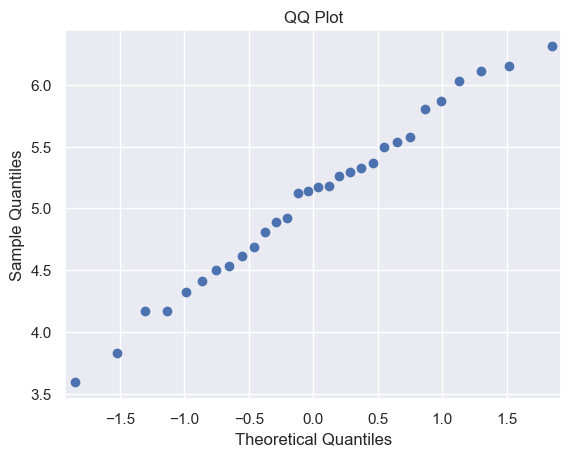

In [129]:
# Create a QQ plot
sm.qqplot(df['weight'])

plt.title('QQ Plot')
plt.show()

QQ plot draws the correlation between a given data and the normal distribution. It is highly correlated.

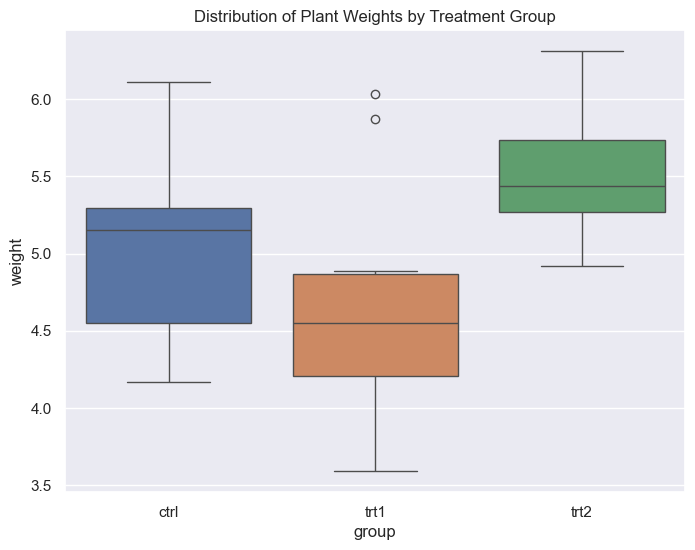

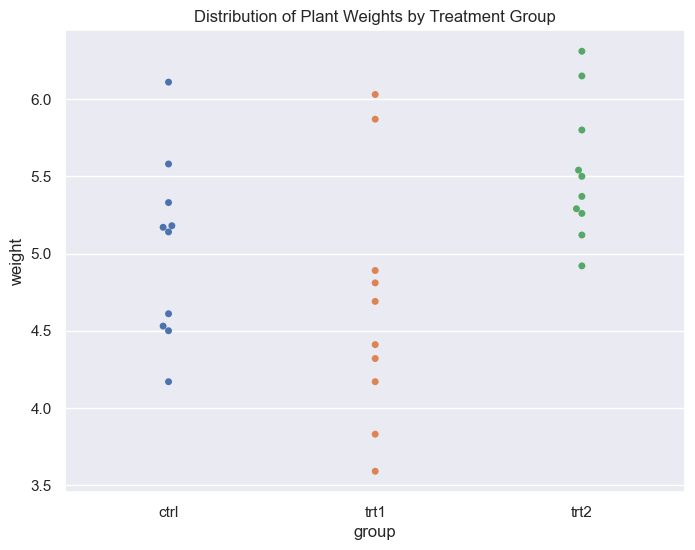

In [130]:
plt.figure(figsize=(8,6))
sns.boxplot(x='group', y='weight', data=df, hue='group')
plt.title("Distribution of Plant Weights by Treatment Group")
plt.show();

plt.figure(figsize=(8,6))
sns.swarmplot(x='group', y='weight', data=df, hue='group')
plt.title("Distribution of Plant Weights by Treatment Group")
plt.show();

There are two data points in the trt1 group which could be considered as outliers as seen in boxplot.

In [131]:
stats.levene(group_ctrl, group_trt1, group_trt2)

LeveneResult(statistic=np.float64(1.1191856948703909), pvalue=np.float64(0.3412266241254737))

The p-value is 0.341 (greater than 0.05) for Levene's test for homogeneity of variances. It fails to reject the null hypothesis that the groups are not significantly different.



### **3. Describe what a t-test is, how it works, and what the assumptions are.**

**References:**

1. [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind)
1. [t-Test - Full Course - Everything you need to know](https://www.youtube.com/watch?v=VekJxtk4BYM)
1. [Independent t-test using SPSS Statistics](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php)



**What is a t-test?**

A t-test is a statistical test used to compare the mean of a continuous variable between two groups. It essentially tests the null hypothesis that the means of the two groups are equal. If the p-value from the t-test is less than the chosen significance level (commonly 0.05), we reject the null hypothesis and conclude that there is a statistically significant difference in the means.

**Hypotheses:**

Null Hypothesis (H0): The means of the two groups are equal.

Alternative Hypothesis (H1): The means of the two groups are not equal.

**Test Statistic:**

The t-statistic measures the size of the difference relative to the variation in the sample data. A larger absolute t-value typically indicates a greater difference between group means.

**P-value:**

The p-value tells us the probability of observing the data or something more extreme if the null hypothesis were true.

**Assumptions of the t-test:**

- Assumption #1: Dependent variable must be continuous (interval or ratio level, e.g., IQ, weight, exam scores).

- Assumption #2: Independent variable must have two categorical, independent groups (e.g., gender, smoker status).

- Assumption #3: Observations must be independent (no overlap between groups or participants in multiple groups).

- Assumption #4: Data must have no significant outliers (extreme values can invalidate results).

- Assumption #5: Dependent variable should be approximately normally distributed within groups (testable via Shapiro-Wilk test).

- Assumption #6: Homogeneity of variances is required (tested using Levene’s test).

### **4. Perform a t-test to determine whether there is a significant difference between the two treatment groups `trt1` and `trt2`.**

**References:**

1. [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind)

In [132]:
# Perform a t-test.
stats.ttest_ind(group_trt1, group_trt2)

TtestResult(statistic=np.float64(-3.0100985421243616), pvalue=np.float64(0.0075184261182198574), df=np.float64(18.0))

The null hypothesis would be rejected as the p-value < 0.05. There is a statistically significant difference between the mean plant weight of the trt1 and trt2 groups.

### **5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups `ctrl`, `trt1`, and `trt2`**

**References:**

1. [stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#f-oneway)
1. [stats.tukey_hsd](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html#tukey-hsd)


Null Hypothesis (H0): All group means are equal.

Alternative Hypothesis (H1): At least one group mean is different from the others.

In [133]:
# Perform ANOVA.
f, p = stats.f_oneway(group_ctrl, group_trt1, group_trt2)

# Show.
f, p

(np.float64(4.846087862380136), np.float64(0.015909958325622895))

The p-value < 0.05, it suggests that the null hypothesis should be rejected and at least one group’s mean weight is significantly different from the others.

To determine which groups mean is different from the others we can perform a Tukey test.

In [134]:
# Tukey's HSD.
res = stats.tukey_hsd(group_ctrl, group_trt1, group_trt2)

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.371     0.391    -0.320     1.062
 (0 - 2)     -0.494     0.198    -1.185     0.197
 (1 - 0)     -0.371     0.391    -1.062     0.320
 (1 - 2)     -0.865     0.012    -1.556    -0.174
 (2 - 0)      0.494     0.198    -0.197     1.185
 (2 - 1)      0.865     0.012     0.174     1.556



Significant Difference Found: Between trt1 and trt2.

No Significant Difference Found: Between ctrl and trt1, and between ctrl and trt2.

The only the pair trt1 vs. trt2 stands out as having a statistically significant difference in their mean plant weights (comparison 1 vs 2).

### **6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.**

1. [Why not compare groups with multiple t-tests?](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php)

ANOVA is used instead of multiple t-tests to control the Type I error rate. Each time you conduct a t-test, there is a risk of making a Type I error. Typically, a p-value below 0.05 is used as the threshold for statistical significance, representing a 5% risk of incorrectly identifying a difference as significant. Performing multiple t-tests increases the risk of a Type I error with each additional test, leading to a much higher overall experiment-wide error rate. For example, running two t-tests on the same data increases this risk to approximately 10%. Such error rates are unacceptably high.

 ANOVA addresses this issue by allowing for post-hoc pairwise comparisons, such as Tukey tests, which adjust the error rate to maintain the total risk at 5% or lower.



In [135]:
no_of_loops = 10_000
n = 30
alpha = 0.05

no_type_i = 0

for _ in range(no_of_loops):
    # Generate groups with no true difference i.e. null hypothesis is true
    group_1 = np.random.normal(loc=10, scale=2, size=n)
    group_2 = np.random.normal(loc=10, scale=2, size=n)
    group_3 = np.random.normal(loc=10, scale=2, size=n)
    
    # Perform paired t-tests
    p_values = []
    p_values.append(stats.ttest_ind(group_1, group_2).pvalue)
    p_values.append(stats.ttest_ind(group_1, group_3).pvalue)
    p_values.append(stats.ttest_ind(group_2, group_3).pvalue)
    
    # Loop through each p-value and check if p > alpha
    for p in p_values:
        if p < alpha:
            no_type_i += 1
            break

# Calculate the Type I error rate
multiple_ttests_error_rate = no_type_i / no_of_loops
print(f"Type I Error Rate (with multiple t-tests): {multiple_ttests_error_rate}")

# Compare with the nominal Type I error rate
print(f"Type I Error Rate (single test): {alpha}")


Type I Error Rate (with multiple t-tests): 0.1201
Type I Error Rate (single test): 0.05


As demonstrated above, the Type I Error Rate is higher while running multiple T-Tests.

---

# End